In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle_perimeter
from time import time
%matplotlib notebook
import sys
sys.path.append('../..')
import smalldata_tools.utilities_FitCenter as fc

In [3]:
im = np.load('../../test/test_data/AvImg_xppo5616_Run716.npy')
mask = np.load('../../test/test_data/AvImg_xppo5616_Run716_mask.npy')

In [4]:
res, info, _ = fc.FindFitCenter(im, mask)

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.5.2/lib/python2.7/site-packages/numba/ir_utils.py:2030: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'zip_obj' of function '_transform_hough_array'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../smalldata_tools/utilities_FitCenter.py", line 54:
@jit(cache=True, nopython=True)
def _transform_hough_array(ar_hough, radii, zip_obj, center_x, center_y, dr, r_low, r_hi):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [5]:
print('result ', res)

('result ', {'info': {'qtf': array([ -7.66075524e-06,   3.37555120e-06]), 'nfev': 10, 'fjac': array([[ -5.62839006e+01,   1.78122480e-02,   1.78131685e-02, ...,
          1.39044828e-02,   1.38519235e-02,   1.54540219e-02],
       [ -4.11660656e-03,  -5.62628543e+01,   2.41072110e-04, ...,
         -1.10586621e-02,  -1.11248132e-02,  -8.74746000e-03]]), 'fvec': array([ 0.19668543,  0.17664261,  0.15964786, ..., -0.49949565,
        0.1226025 ,  0.26642748]), 'ipvt': array([2, 1], dtype=int32)}, 'C': array([[  3.15904984e-04,  -2.31053021e-08],
       [ -2.31053021e-08,   3.15668776e-04]]), 'success': 3, 'xCen': 847.07352509152054, 'residu': [648.04605848174492, 675.72748044636933, 522.42925039456304, 291.63675837529138], 'R': [327.78745638895504, 336.50523783700697, 173.39877718424756, 164.83525506597096], 'msg': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000 and the relative error between two consecutive iterates is at \n  most 0.000000', 

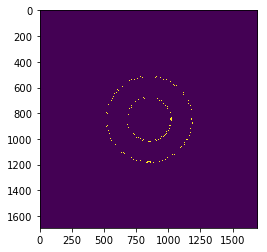

In [6]:
edges, sparse_edges = fc.find_edges(im, mask, 4, 0.98, 0.92)
plt.figure()
plt.imshow(edges)
plt.show()

In [8]:
r_vals, x, y = fc.iterate_center(sparse_edges, 1.5, [1, 1401], 280, 100, 1, 5, True, -1)

In [10]:
res, ring_info, edges = fc.ransac_result(sparse_edges, [x, y], r_vals, 10, 5, 40, 10, 2, 0.45)

In [11]:
center_x = res['x_cen']
center_y = res['y_cen']
plt.figure()
plt.imshow(im)
for r in res['R']:
    circy, circx = circle_perimeter(int(center_y), int(center_x), int(r), shape=im.shape)
    plt.scatter(circy, circx, s=5)
plt.scatter(center_x, center_y)
plt.show()

KeyError: 'x_cen'